# Markov Chains
De kansentabel kan worden omgeschreven in een kansen / transitie matrix: 
$\begin{bmatrix}0.8&0.1&0.1\\0.4&0.5&0.1\\0.6&0.2&0.2\end{bmatrix}$<br><br>
Vervolgens kan de <i>np.dot()</i> functie worden gebruikt met als argumenten de 'weights' vector [0.1, 0.7, 0.2] en de bovenstaande transitiematrix.<br>
Omdat het uitrekenen en plotten van de kansen over tijd meerdere keren moet gebeuren kan van de acties een functie worden geschreven:

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def plotmarkov(transition, weights, names):
    y = np.array([weights])
    for i in range(50):
        weights = np.dot(weights, transition)
        y = np.append(y, [weights], axis=0)
    x = np.arange(51)
    end = []
    for i in range(len(y[0, :])):
        plot_y = y[:, i]    #plot elke kolom = elk element in de Markov Chain
        plt.plot(x, plot_y)
        end.append(plot_y[-1])
    plt.legend(names, loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()
    for i in range(len(names)):
        print("{}: {}%".format(names[i], round(end[i] * 100, 1)))

Met behulp van deze functie kan data worden geplot en geprint

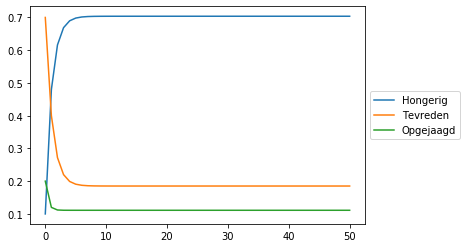

Hongerig: 70.4%
Tevreden: 18.5%
Opgejaagd: 11.1%


In [6]:
transition = np.array([[0.8, 0.1, 0.1],
                       [0.4, 0.5, 0.1],
                       [0.6, 0.2, 0.2]])
weights = np.array([0.1, 0.7, 0.2])
names = ["Hongerig", "Tevreden", "Opgejaagd"]
plotmarkov(transition, weights, names)

Met het gebruik van dezelfde functie kan de data worden uitgebreid naar een 4x4 transitiematrix:

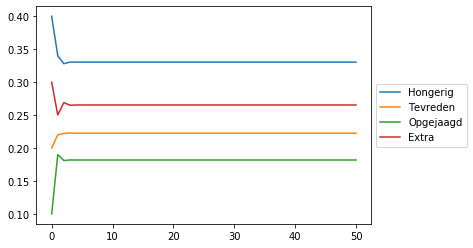

Hongerig: 33.0%
Tevreden: 22.2%
Opgejaagd: 18.2%
Extra: 26.5%


In [7]:
transition2 = np.array([[0.3, 0.2, 0.2, 0.3],
                        [0.6, 0.1, 0.2, 0.1],
                        [0.1, 0.3, 0.1, 0.5],
                        [0.3, 0.3, 0.2, 0.2]])
weights2 = np.array([0.4, 0.2, 0.1, 0.3])
names2 = ["Hongerig", "Tevreden", "Opgejaagd", "Extra"]
plotmarkov(transition2, weights2, names2)

## Eigenbasis
De eigenvalues van de transitiematrix kunnen berekend worden met $det(\lambda I_n - A) = 0$<br>
$\begin{bmatrix}\lambda-0.8&-0.1&-0.1\\-0.4&\lambda-0.5&-0.1\\-0.6&-0.2&\lambda-0.2\end{bmatrix}$<br><br>
Een methode om de determinant = 0 te bepalen is het gebruik van de Sarrus-regel:<br><br>
$\begin{bmatrix}\lambda-0.8&-0.1&-0.1\\-0.4&\lambda-0.5&-0.1\\-0.6&-0.2&\lambda-0.2\end{bmatrix}$
$\begin{matrix}\lambda-0.8&-0.1\\-0.4&\lambda-0.5\\-0.6&-0.2\end{matrix}$<br><br>
$(\lambda-0.8)(\lambda-0.5)(\lambda-0.2) - 0.006 - 0.008 - 0.06(\lambda-0.5) - 0.02(\lambda-0.8) - 0.04(\lambda-0.2) =$<br>
$\lambda^3 - 0.7\lambda^2 + 0.1\lambda - 0.8\lambda^2 + 0.56\lambda -0.08 - 0.014 - 0.06\lambda + 0.03 - 0.02\lambda + 0.016 - 0.04\lambda + 0.008 =$<br>
$\lambda^3 - 1.5\lambda^2 + 0.54\lambda - 0.04 = 0$<br><br>
Bij het oplossen van bovenstaande vergelijking is: $\lambda = 1, \lambda = 0.4, \lambda = 0.1$<br><br>
Deze variabelen kunnen worden gebruikt als eigenbasis matrix:<br>
$\begin{bmatrix}1&0&0\\0&0.4&0\\0&0&0.1\end{bmatrix}$<br><br>
Bij deze matrix is het makkelijk om deze tot de macht n te doen, in dit geval n = 100:<br><br>
$\begin{bmatrix}1^{100}&0&0\\0&0.4^{100}&0\\0&0&0.1^{100}\end{bmatrix}$<br><br>
In combinatie met de matrix van eigenvectors kan deze matrix worden teruggerekend tot de oorspronkelijke transitiematrix maar dan ook tot de macht 100:<br><br>
$\begin{bmatrix}1&-2&-0.125\\1&7&-0.125\\1&1&1\end{bmatrix}$
$\begin{bmatrix}1^{100}&0&0\\0&0.4^{100}&0\\0&0&0.1^{100}\end{bmatrix}$
$\begin{bmatrix}1&-2&-0.125\\1&7&-0.125\\1&1&1\end{bmatrix}^{-1}$<br><br>
Bij het vermenigvuldigen van bovenstaande ontstaat een 3x3 matrix met omgezet hetzelfde aantal procenten als bij de eerste berekening (Hongerig: 70,4%, Tevreden: 18.5%, Opgejaagd: 11.1%)
### Implementatie
Voor controle kan bovenstaande berekening geïmplementeerd worden in python:

In [9]:
start = np.array([[0.8, 0.1, 0.1],
                  [0.4, 0.5, 0.1],
                  [0.6, 0.2, 0.2]])
eigenvectors = np.array([[1, -2, -0.125], [1, 7, -0.125], [1, 1, 1]])
inv = np.linalg.inv(eigenvectors)
eigenbasis = np.array([[1, 0, 0], [0, 0.4, 0], [0, 0, 0.1]])
deel = np.dot(v, np.linalg.matrix_power(eigenbasis, 100))
terug = np.dot(deel, inv)
for i in terug[0]:
    print("{}%".format(round(i * 100, 1)))

70.4%
18.5%
11.1%
